In [1]:
#1 Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
import stat
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [2]:
#2 Import Data
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


#### DATA UNDERSTANDING

In [3]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [4]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud_data.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


**Data Transformation**

In [6]:
fraud_data_ohe = pd.get_dummies(data=fraud_data, columns = ['Undergrad','Marital.Status','Urban'])
fraud_data_ohe

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [7]:
import warnings 
warnings.filterwarnings('ignore')

In [8]:
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

for i in range(len(fraud_data_ohe['Taxable.Income'])):
    if fraud_data_ohe['Taxable.Income'][i] <= 30000:
        fraud_data_ohe['Taxable.Income'][i] = 'risky'
    else:
        fraud_data_ohe['Taxable.Income'][i] = 'good'

#### Model Building

In [12]:
X = fraud_data_ohe.drop(labels='Taxable.Income',axis=1)
y = fraud_data_ohe[['Taxable.Income']]

In [13]:
X

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [14]:
y

,Taxable.Income
0,good
1,good
2,good
3,good
4,good
...,...
595,good
596,good
597,good
598,good


#### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)

In [18]:
#Training data 
X_train.shape , y_train.shape

((480, 9), (480, 1))

In [19]:
#Test Data
X_test.shape , y_test.shape

((120, 9), (120, 1))

#### MODEL TRAINING

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

#### Model Testing

In [22]:
#Training Data
y_train_pred = dt_model.predict(X_train)

In [23]:
#Test Data
y_test_pred = dt_model.predict(X_test)

#### Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix 

In [25]:
#Training Data 
accuracy_score(y_train,y_train_pred)

1.0

In [26]:
confusion_matrix(y_train,y_train_pred)

array([[369,   0],
       [  0, 111]], dtype=int64)

In [27]:
#TEST DATA
accuracy_score(y_test,y_test_pred)

0.6083333333333333

In [28]:
confusion_matrix(y_test,y_test_pred)

array([[70, 37],
       [10,  3]], dtype=int64)

In [75]:
dt_model.feature_importances_

array([0.57694865, 0.1960636 , 0.03609846, 0.0184729 , 0.02713515,
       0.05200035, 0.03670981, 0.01620382, 0.04036726])

In [77]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': dt_model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [78]:
fi

,feature,importance
0,City.Population,0.576949
1,Work.Experience,0.196064
5,Marital.Status_Married,0.052000
8,Urban_YES,0.040367
6,Marital.Status_Single,0.036710
2,Undergrad_NO,0.036098
4,Marital.Status_Divorced,0.027135
3,Undergrad_YES,0.018473
7,Urban_NO,0.016204


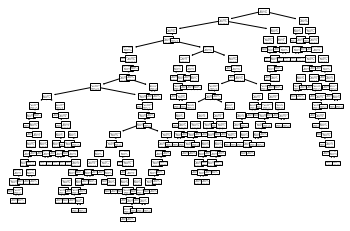

In [83]:
from sklearn import tree
tree.plot_tree(dt_model);

### Building Decision Tree Classifier (CART) using Gini Criteria

In [66]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [67]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

#### Model Testing

In [68]:
#Training Data
y_train_pred2 = model_gini.predict(X_train)

In [69]:
#Test Data
y_test_pred2 = model_gini.predict(X_test)

#### Model Evaluation

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix 

In [71]:
#Training Data 
accuracy_score(y_train,y_train_pred2)

0.8020833333333334

In [72]:
confusion_matrix(y_train,y_train_pred2)

array([[367,   2],
       [ 93,  18]], dtype=int64)

In [73]:
#TEST DATA
accuracy_score(y_test,y_test_pred2)

0.825

In [74]:
confusion_matrix(y_test,y_test_pred2)

array([[99,  8],
       [13,  0]], dtype=int64)

In [76]:
model_gini.feature_importances_

array([0.62719423, 0.33092825, 0.        , 0.        , 0.        ,
       0.02569677, 0.01618076, 0.        , 0.        ])

In [81]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model_gini.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [80]:
fi

,feature,importance
0,City.Population,0.627194
1,Work.Experience,0.330928
5,Marital.Status_Married,0.025697
6,Marital.Status_Single,0.016181
2,Undergrad_NO,0.000000
3,Undergrad_YES,0.000000
4,Marital.Status_Divorced,0.000000
7,Urban_NO,0.000000
8,Urban_YES,0.000000


**City Popluation = Most important feature**

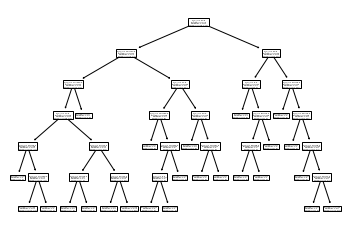

In [82]:
from sklearn import tree
tree.plot_tree(model_gini);